In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sb
from datetime import datetime

police_data_csv = "../Resources/Police_Department_Incidents.csv"

police_data = pd.read_csv(police_data_csv)
police_data.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [3]:
police_data["Month"] = pd.DatetimeIndex(police_data['Date']).month
police_data["Hour"] = pd.to_datetime(police_data['Time'], format='%H:%M').dt.hour
police_data["Day"] = pd.DatetimeIndex(police_data['Date']).day

In [4]:
police_data.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,Month,Hour,Day
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120,1,11,29
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168,1,11,29
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010,4,14,25
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000,1,23,5
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000,1,0,1


In [5]:
police_data['Category'].unique()

array(['WEAPON LAWS', 'WARRANTS', 'NON-CRIMINAL', 'ASSAULT',
       'OTHER OFFENSES', 'MISSING PERSON', 'LARCENY/THEFT', 'BURGLARY',
       'STOLEN PROPERTY', 'ROBBERY', 'FRAUD', 'DRUG/NARCOTIC',
       'VEHICLE THEFT', 'RECOVERED VEHICLE', 'VANDALISM', 'ARSON',
       'PROSTITUTION', 'SECONDARY CODES', 'SUSPICIOUS OCC', 'DRUNKENNESS',
       'TRESPASS', 'SEX OFFENSES, NON FORCIBLE', 'SEX OFFENSES, FORCIBLE',
       'RUNAWAY', 'KIDNAPPING', 'DISORDERLY CONDUCT',
       'DRIVING UNDER THE INFLUENCE', 'FORGERY/COUNTERFEITING',
       'EMBEZZLEMENT', 'BRIBERY', 'FAMILY OFFENSES', 'GAMBLING',
       'SUICIDE', 'LIQUOR LAWS', 'EXTORTION', 'LOITERING', 'TREA',
       'BAD CHECKS', 'PORNOGRAPHY/OBSCENE MAT'], dtype=object)

In [6]:
drinking = ['DRUNKENNESS','DRIVING UNDER THE INFLUENCE']
drunk_data = police_data.loc[police_data['Category'].isin(drinking)]
sort_drunk_data = drunk_data.sort_values("Hour")
sort_drunk_data.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,Month,Hour,Day
110377,161052065,DRUNKENNESS,UNDER INFLUENCE OF ALCOHOL IN A PUBLIC PLACE,Wednesday,12/28/2016 12:00:00 AM,00:17,SOUTHERN,NONE,MISSION ST / GRACE ST,-122.415487,37.775606,"(37.7756059226244, -122.415487220744)",16105206519090,12,0,28
24174,160070004,DRIVING UNDER THE INFLUENCE,DRIVING WHILE UNDER THE INFLUENCE OF ALCOHOL,Monday,01/25/2016 12:00:00 AM,00:12,TENDERLOIN,"ARREST, BOOKED",TURK ST / LEAVENWORTH ST,-122.414056,37.782793,"(37.7827931071006, -122.414056291891)",16007000465050,1,0,25
107019,150796511,DRIVING UNDER THE INFLUENCE,DRIVING WHILE UNDER THE INFLUENCE OF DRUGS,Sunday,09/11/2016 12:00:00 AM,00:33,SOUTHERN,EXCEPTIONAL CLEARANCE,TOWNSEND ST / 5TH ST,-122.397208,37.775333,"(37.7753329097568, -122.397207764774)",15079651165060,9,0,11
107057,160000283,DRIVING UNDER THE INFLUENCE,DRIVING WHILE UNDER THE INFLUENCE OF DRUGS,Friday,01/01/2016 12:00:00 AM,00:07,NORTHERN,"ARREST, BOOKED",POLK ST / CEDAR ST,-122.419835,37.786358,"(37.7863580362743, -122.419834938618)",16000028365060,1,0,1
75938,160751298,DRUNKENNESS,UNDER INFLUENCE OF ALCOHOL IN A PUBLIC PLACE,Friday,09/16/2016 12:00:00 AM,00:05,CENTRAL,"ARREST, BOOKED",GREEN ST / COLUMBUS AV,-122.409017,37.799488,"(37.7994880717633, -122.409017007613)",16075129819090,9,0,16


<IPython.core.display.Javascript object>


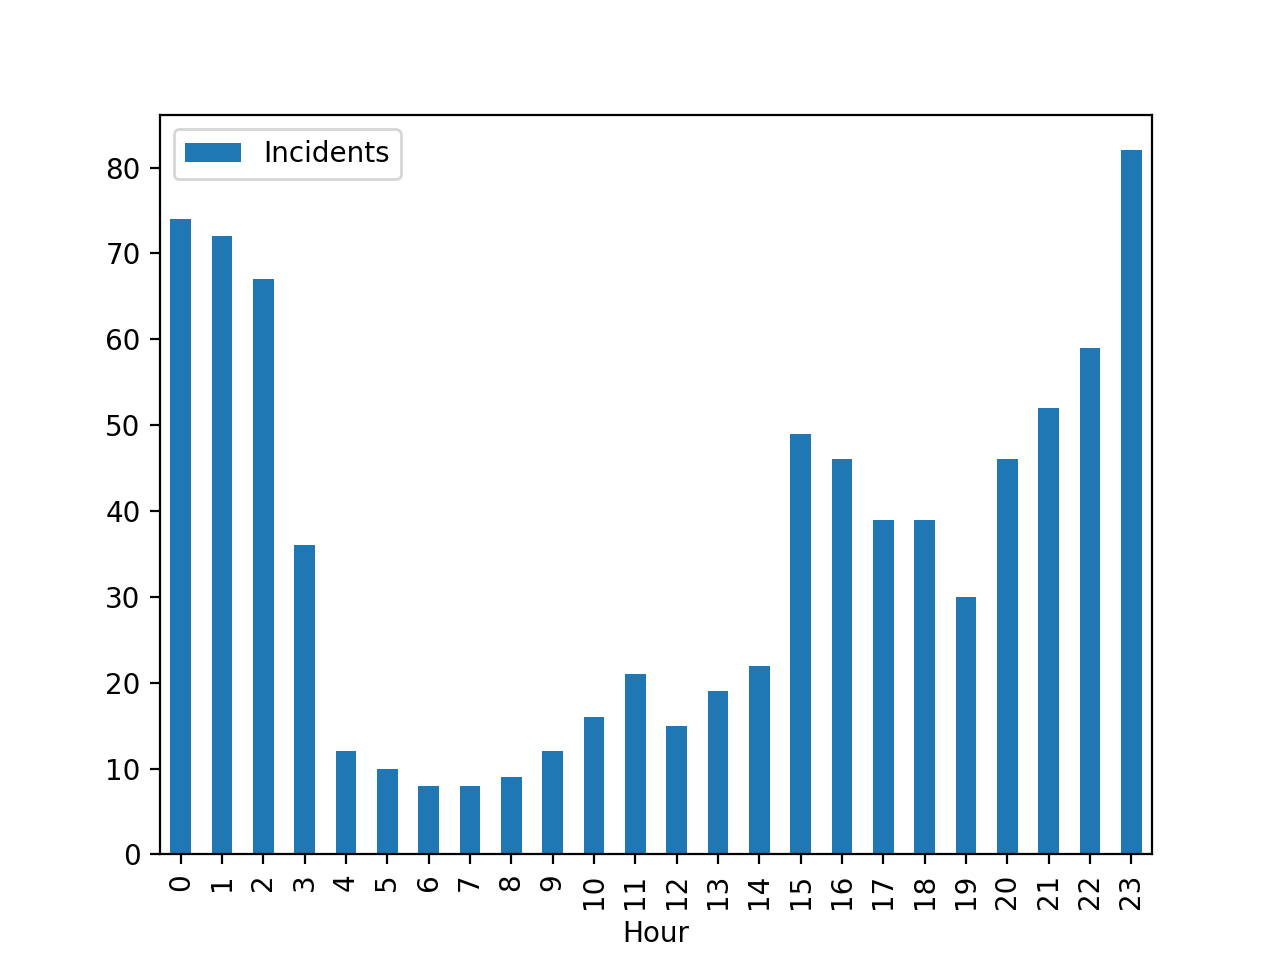

In [7]:
grouped_hours = sort_drunk_data.groupby("Hour")

summary_df = pd.DataFrame({
    "Incidents" : grouped_hours['IncidntNum'].count()
})

summary_df.plot(kind="bar");
plt.savefig("DrunkIncidents_byHour.png")
plt.show()

In [8]:
arrests = police_data.loc[police_data['Resolution'].isin(["ARREST, BOOKED","ARREST, CITED"])]

In [36]:
%matplotlib notebook 

<IPython.core.display.Javascript object>


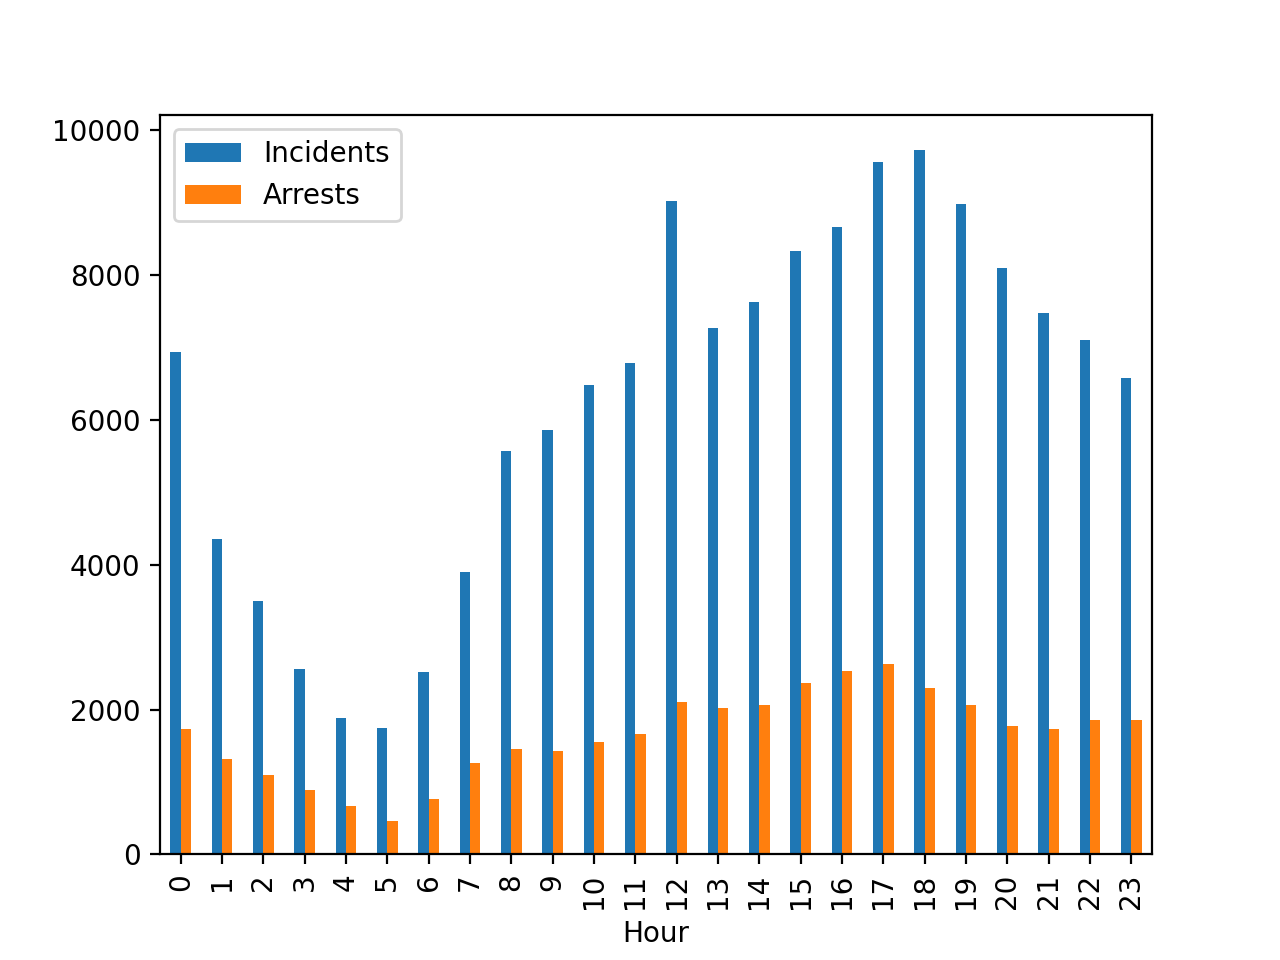

In [37]:
hour_groups = police_data.groupby("Hour")
arrest_groups = arrests.groupby('Hour')
percentage_arrests = arrest_groups['IncidntNum'].count() / hour_groups['IncidntNum'].count()

hourly_summary = pd.DataFrame({
    "Incidents" : hour_groups['IncidntNum'].count(),
    "Arrests" : arrest_groups['IncidntNum'].count(),
})

hourly_summary.plot(kind="bar");

In [38]:
# top = ['LARCENY/THEFT','ASSAULT','VANDALISM','VEHICLE THEFT','DRUG/NARCOTIC']
# top_arrests = arrests.loc[arrests['Category'].isin(top)]
# top_incidents = police_data.loc[police_data['Category'].isin(top)]

# top_incidents_group = top_incidents.groupby('Hour')
# top_arrests_group = top_arrests.groupby('Hour')

# top_hourly_sum = pd.DataFrame({
#     "Incidents" : top_incidents_group['Category'].count()
# })

In [39]:
%matplotlib notebook 

<IPython.core.display.Javascript object>


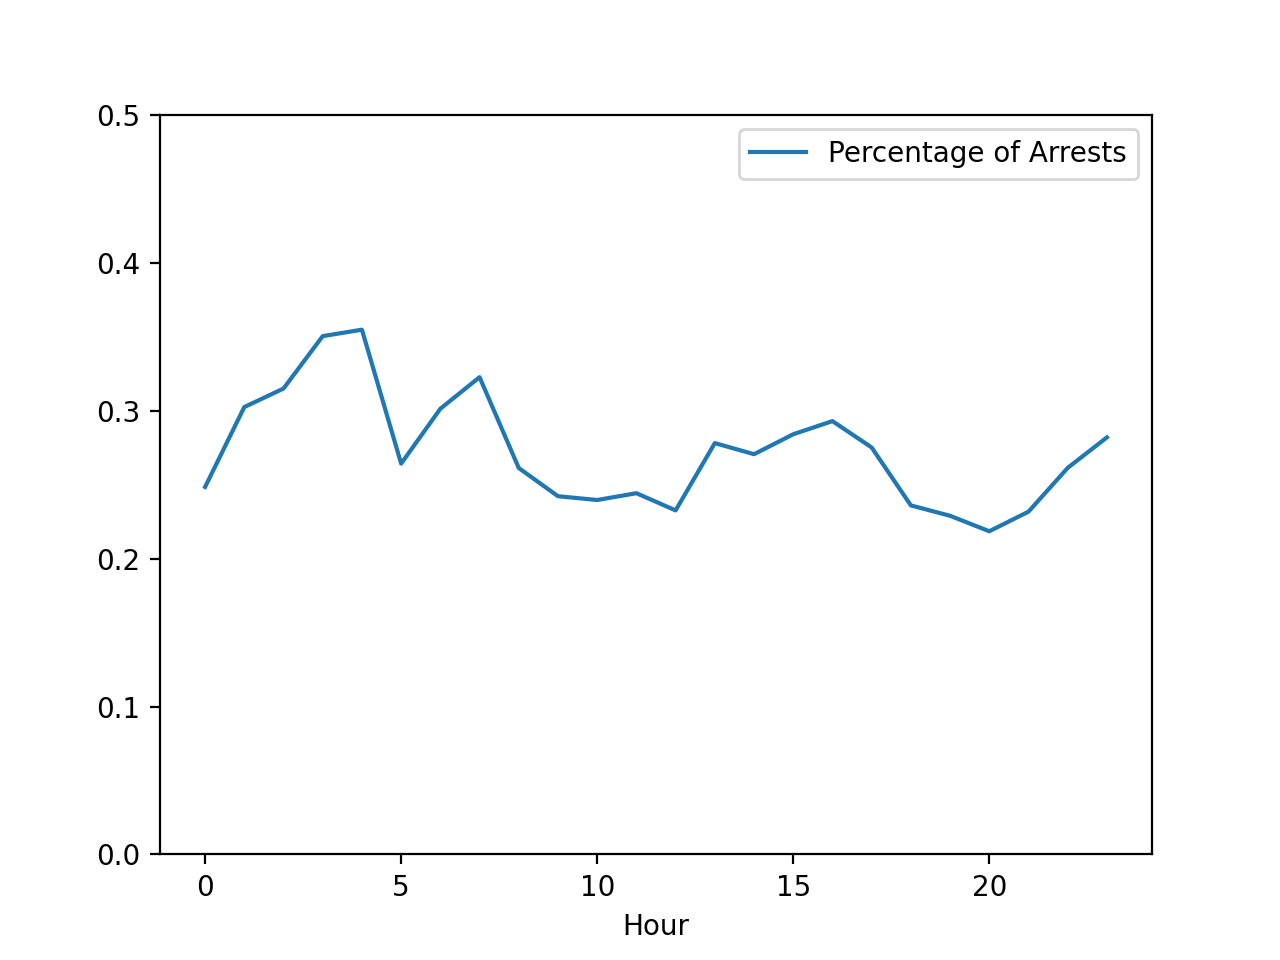

In [40]:
percentage_summary = pd.DataFrame({
    "Percentage of Arrests" : percentage_arrests,
})

percentage_summary.plot(kind="line")
plt.ylim((0, .5)) 

plt.savefig("perc_arrests_byhour.png")
plt.show()

In [41]:
narcotics = police_data.loc[police_data['Category'].isin(["DRUG/NARCOTIC"])]

In [42]:
narc_arrests = narcotics.loc[narcotics['Resolution'].isin(["ARREST, BOOKED","ARREST, CITED"])]

In [43]:
%matplotlib notebook

<IPython.core.display.Javascript object>


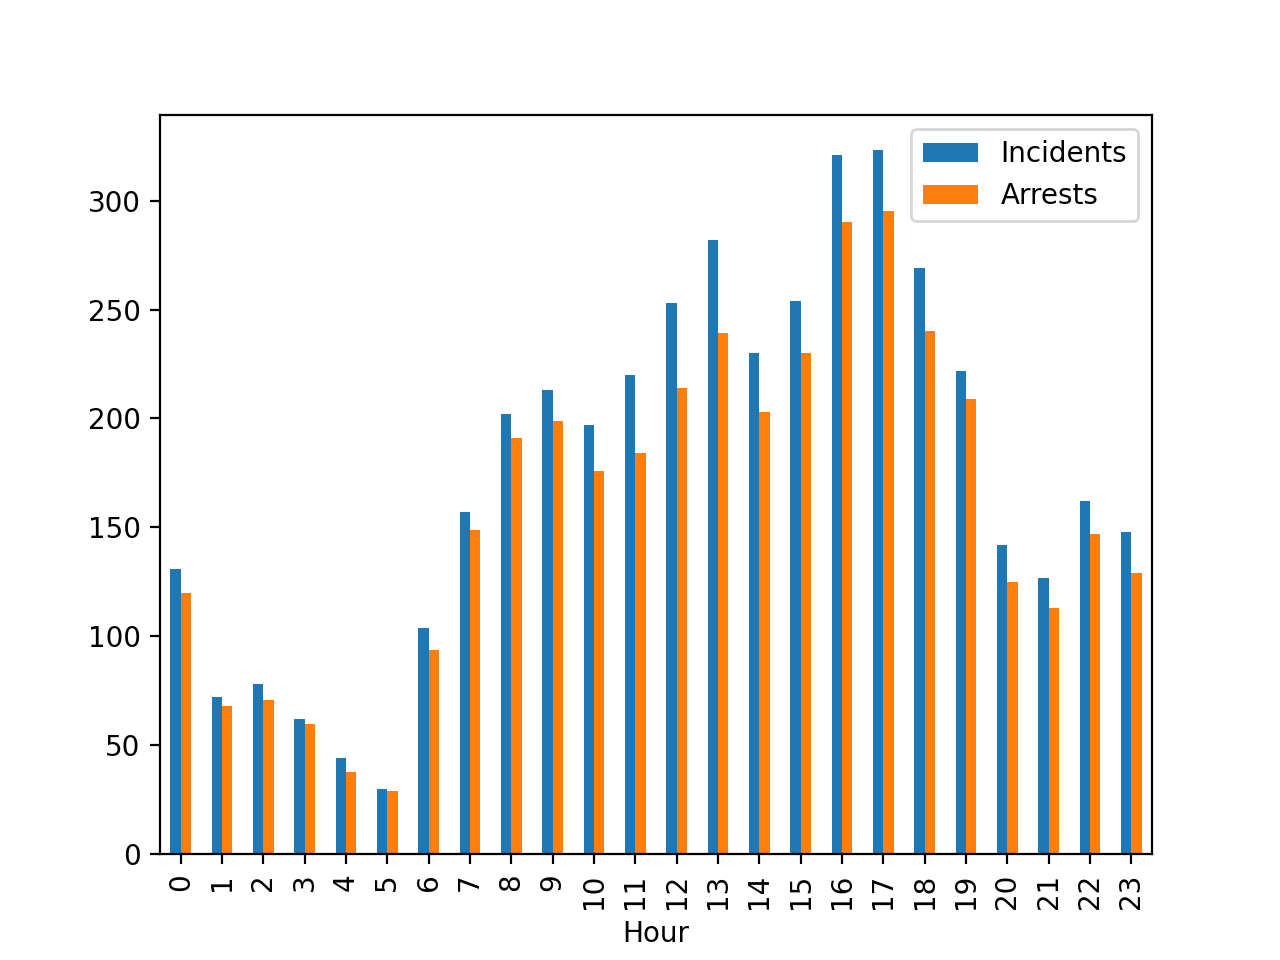

In [44]:
narcotic_incidents = narcotics.groupby('Hour')
narcotic_arrests = narc_arrests.groupby('Hour')
narc_percentage_arrests =  narcotic_arrests['IncidntNum'].count() / narcotic_incidents['IncidntNum'].count()

hourly_summary = pd.DataFrame({
    "Incidents" : narcotic_incidents['IncidntNum'].count(),
    "Arrests" : narcotic_arrests['IncidntNum'].count(),
})

hourly_summary.plot(kind="bar");

In [45]:
%matplotlib notebook

<IPython.core.display.Javascript object>


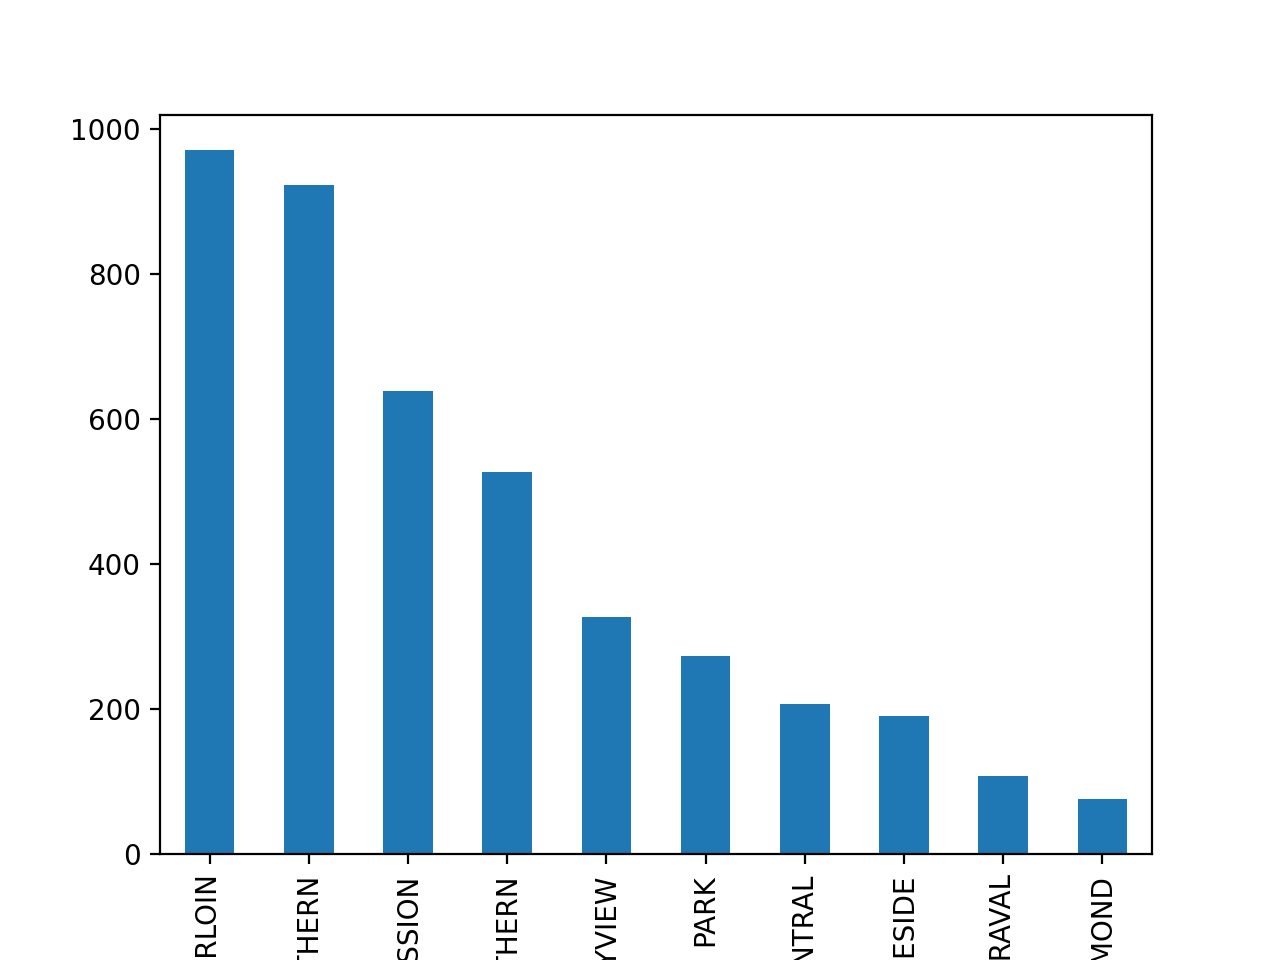

In [46]:
#drug arrests per district
narc_districts = narcotics["PdDistrict"].value_counts()
narc_districts.plot(kind="bar");

In [47]:
%matplotlib notebook

<IPython.core.display.Javascript object>


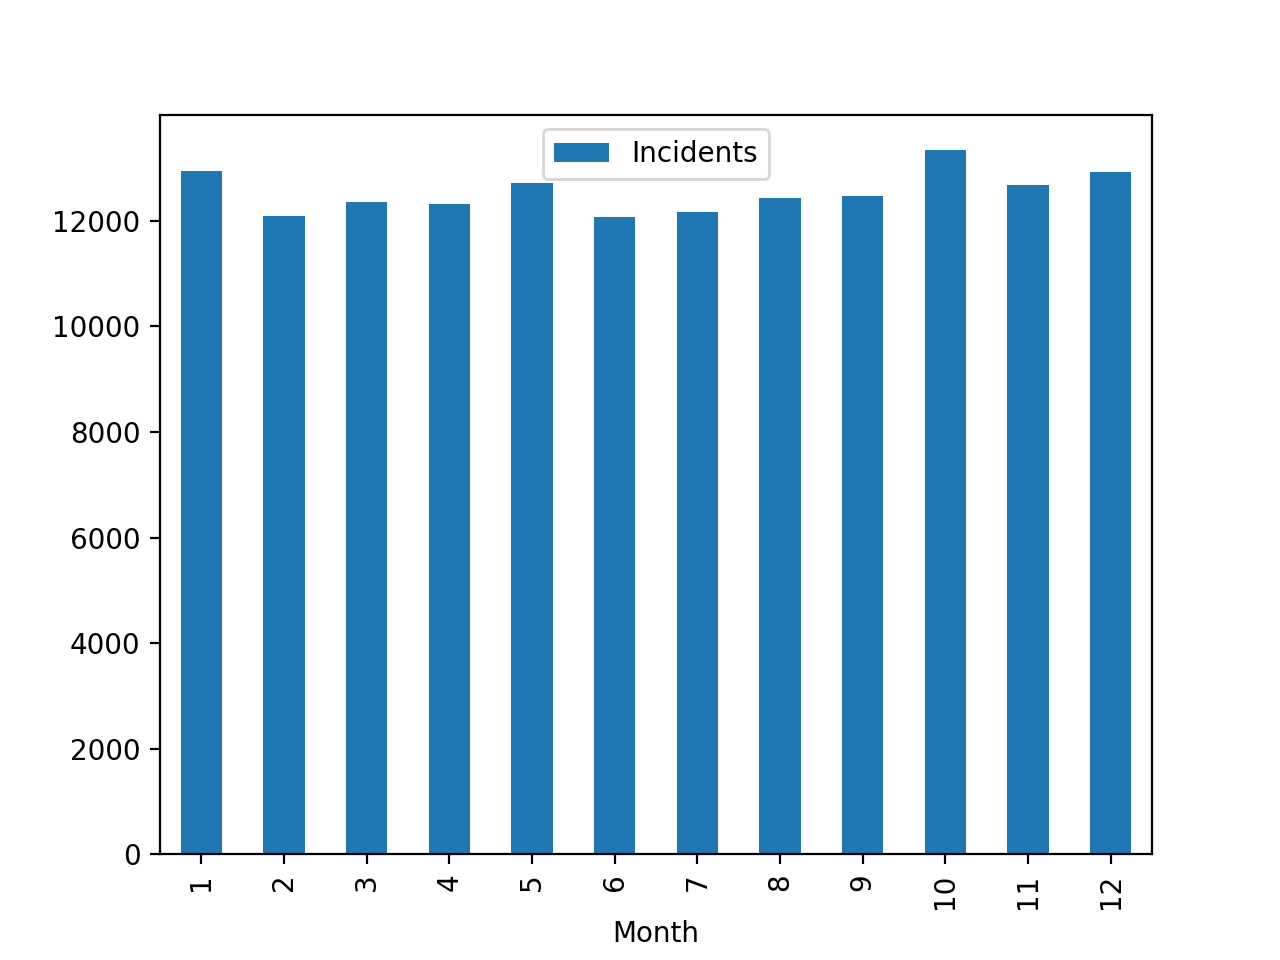

In [48]:
grouped_months = police_data.groupby("Month")
summary_df = pd.DataFrame({
    "Incidents" : grouped_months['IncidntNum'].count()
})
summary_df.plot(kind="bar");

In [49]:
%matplotlib notebook

<IPython.core.display.Javascript object>


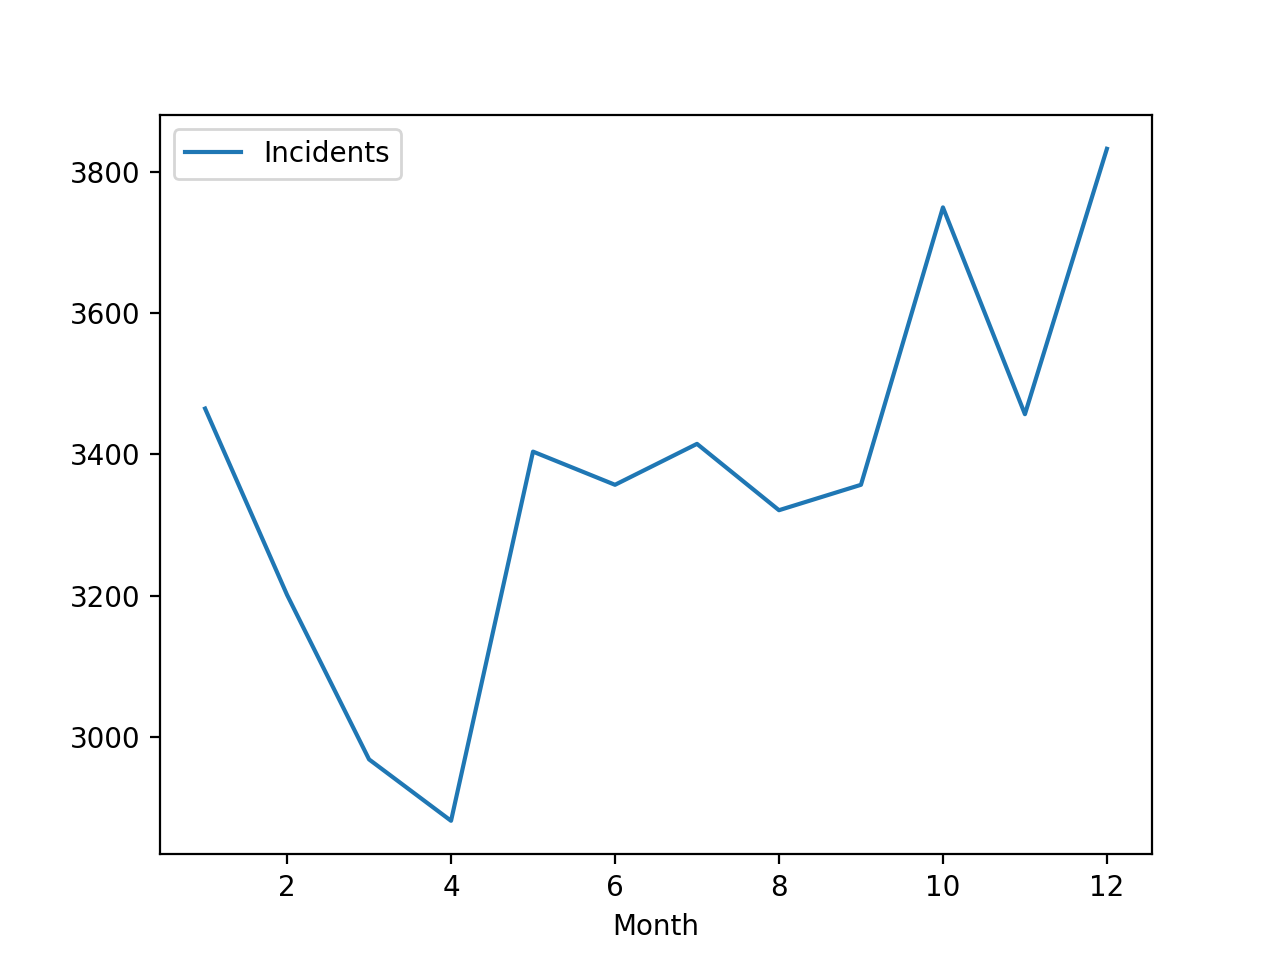

In [50]:
larceny_data = police_data.loc[police_data['Category'].isin(['LARCENY/THEFT'])]
larceny_months = larceny_data.groupby('Month')
larceny_summary_df = pd.DataFrame({
    "Incidents" : larceny_months['IncidntNum'].count()
})
larceny_summary_df.plot(kind="line");

In [51]:
assaults = police_data.loc[police_data['Category'].isin(["ASSAULT"])]
assault_arrests = assaults.loc[assaults['Resolution'].isin(["ARREST, BOOKED","ARREST, CITED"])]
assault_incidents = assaults.groupby('Hour')
assault_arrests_grp = assault_arrests.groupby('Hour')
assault_percentage_arrests =  assault_arrests_grp['IncidntNum'].count() / assault_incidents['IncidntNum'].count()

In [52]:
theft = police_data.loc[police_data['Category'].isin(["LARCENY/THEFT"])]
theft_arrests = theft.loc[theft['Resolution'].isin(["ARREST, BOOKED","ARREST, CITED"])]
theft_incidents = theft.groupby('Hour')
theft_arrests_grp = theft_arrests.groupby('Hour')
theft_percentage_arrests =  theft_arrests_grp['IncidntNum'].count() / theft_incidents['IncidntNum'].count()

In [53]:
vandalism = police_data.loc[police_data['Category'].isin(["VANDALISM"])]
vandalism_arrests = vandalism.loc[vandalism['Resolution'].isin(["ARREST, BOOKED","ARREST, CITED"])]
vandalism_incidents = vandalism.groupby('Hour')
vandalism_arrests_grp = vandalism_arrests.groupby('Hour')
vandalism_percentage_arrests =  vandalism_arrests_grp['IncidntNum'].count() / vandalism_incidents['IncidntNum'].count()

In [54]:
timeofday = ["12am",'1am','2am','3am']

In [55]:
%matplotlib notebook

<IPython.core.display.Javascript object>


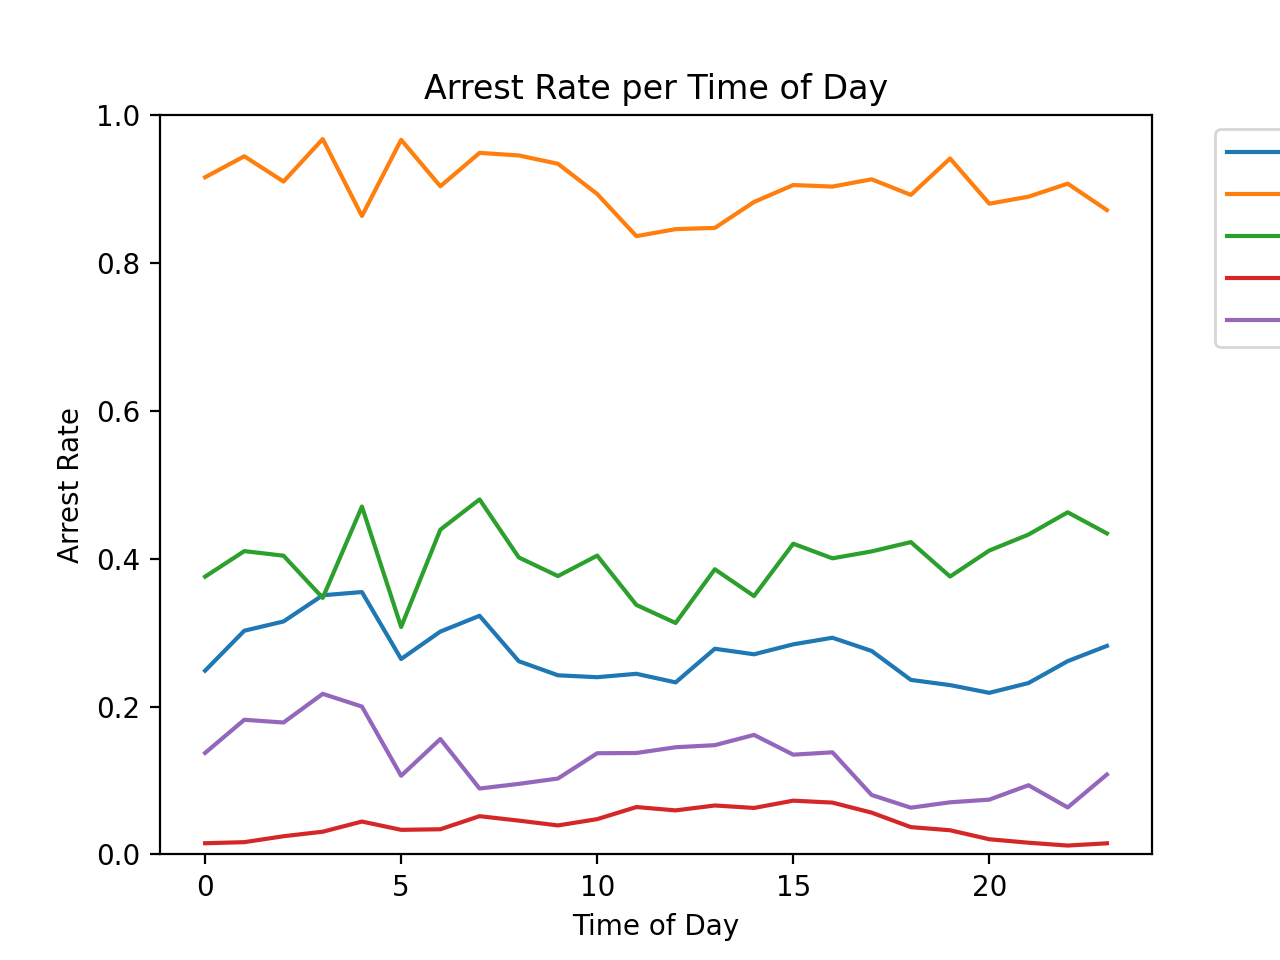

Text(0, 0.5, 'Arrest Rate')

In [56]:
percentage_summary = pd.DataFrame({
    "Avg" : percentage_arrests,
    "Narcotics" : narc_percentage_arrests,
    "Assaults" : assault_percentage_arrests,
    "Larceny/Theft" : theft_percentage_arrests,
    "Vandalism" : vandalism_percentage_arrests
})

sum_chart = percentage_summary.plot(kind="line")
plt.ylim((0, 1)) 
plt.legend(bbox_to_anchor=(1.05, 1))
plt.title("Arrest Rate per Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Arrest Rate")
# sum_chart.set_xticks()
# sum_chart.set_xticklabels(timeofday, rotation=45)